"""y - Whether the client has subscribed a term deposit or not. Binomial ("yes" or "no")

Attribute information For bank dataset
Input variables:
Bank client data:

1 - age : (numeric)

2 - job : type of job (categorical: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services")

3 - marital : marital status (categorical: "married", "divorced", "single"; note: "divorced" means divorced or widowed)

4 - education (categorical: "unknown", "secondary","primary", "tertiary")

5 - default: has credit in default? (binary: "yes", "no")

6 - balance: average yearly balance, in euros (numeric)

7 - housing: has housing loan? (binary: "yes", "no")

8 - loan: has personal loan? (binary: "yes", "no")

Related with the last contact of the current campaign:

9 - contact: contact communication type (categorical: "unknown","telephone","cellular")

10 - day: last contact day of the month (numeric)

11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

12 - duration: last contact duration, in seconds (numeric)

Other attributes:

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown", "other", "failure", "success")

Output variable (desired target):

17 - y - has the client subscribed a term deposit? (binary: "yes", "no")"""

In [1]:
# Importing the required libraries for the dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve,classification_report

import warnings
warnings.filterwarnings("ignore")


In [2]:
# Reading the Dataset

bank=pd.read_csv(r"C:\Users\saikr\Downloads\bank-full.csv",delimiter=";")

In [3]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
bank.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [6]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
bank.size

768587

In [8]:
bank.shape

(45211, 17)

In [9]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [10]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [11]:
# Missing Values

bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [12]:
# Duplicated Values

bank[bank.duplicated()].shape

(0, 17)

In [13]:
# Finding the how many discrete and continuous feature are their in our dataset by seperating them in variables

discrete_feature=[feature for feature in bank.columns if len(bank[feature].unique())<20 and feature]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 10


In [14]:
continious_feature=[feature for feature in bank.columns if bank[feature].dtype!="O" and feature not in discrete_feature]
print("Continious Feature Count {}".format(len(continious_feature)))

Continious Feature Count 7


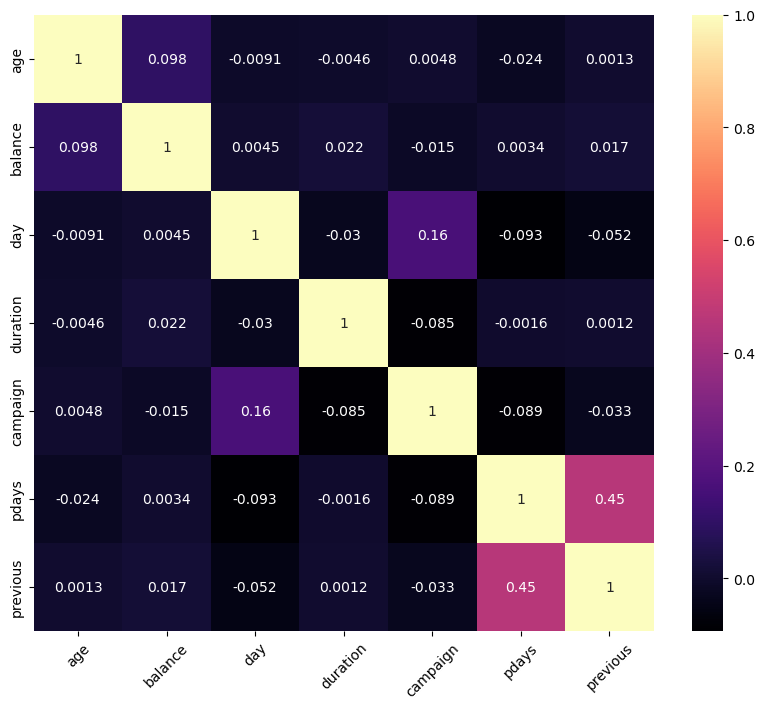

In [15]:
# Assuming 'bank' is your DataFrame
selected_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Check if selected columns exist in the DataFrame
missing_columns = set(selected_columns) - set(bank.columns)
if missing_columns:
    raise ValueError(f"Columns not found in DataFrame: {missing_columns}")

# Select only the specified columns
bank_selected = bank[selected_columns]

# Convert non-numeric values to NaN in the selected columns
bank_numeric = bank_selected.apply(pd.to_numeric, errors='coerce')

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(bank_numeric.corr(), annot=True, cmap='magma', ax=ax)
plt.xticks(rotation=45)
plt.show()


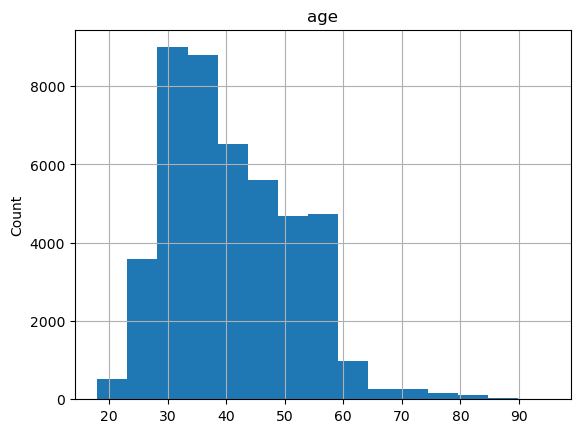

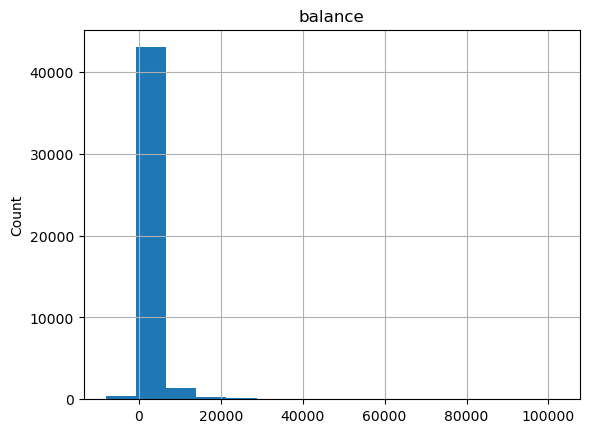

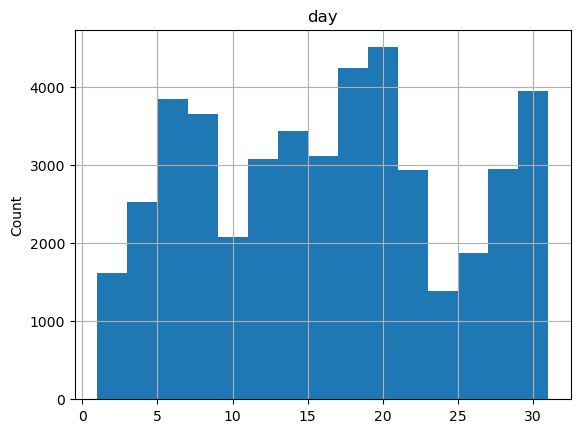

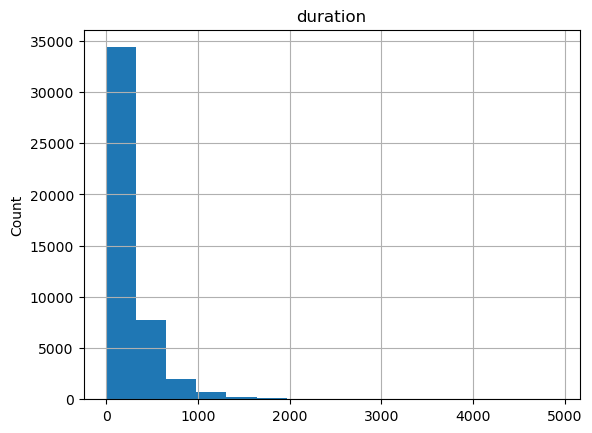

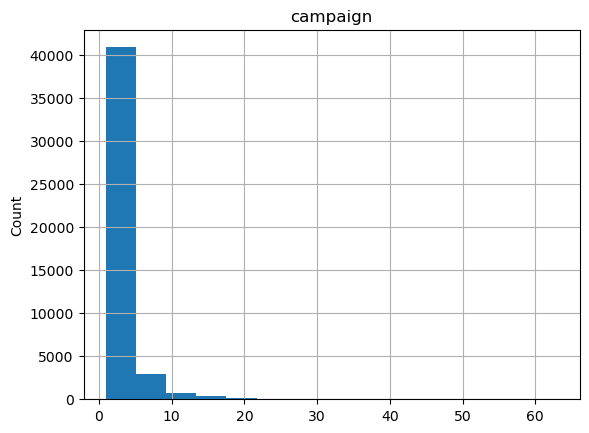

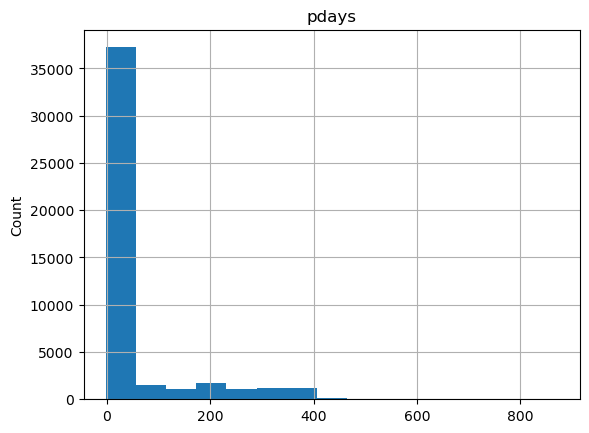

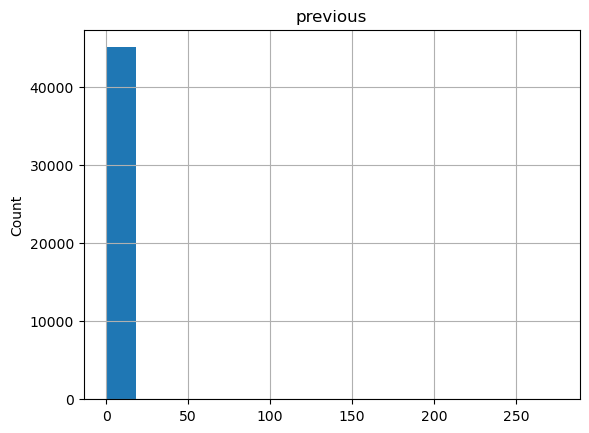

In [16]:
# Histogram

for feature in continious_feature:
    bank_data=bank.copy()
    bank_data[feature].hist(bins=15)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

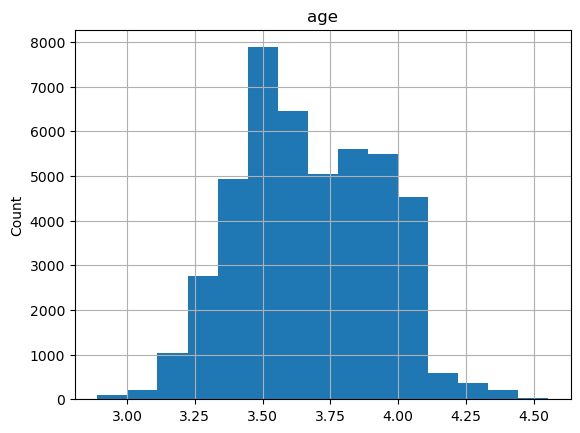

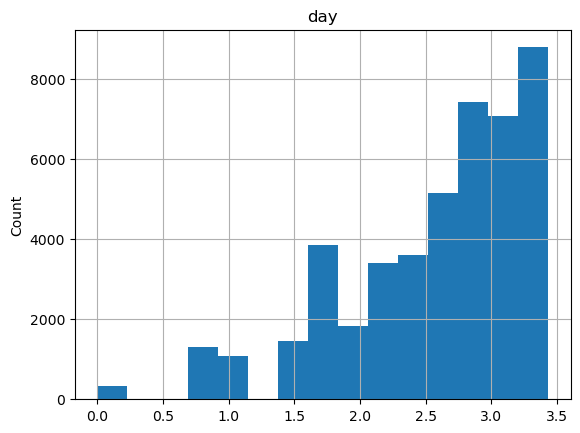

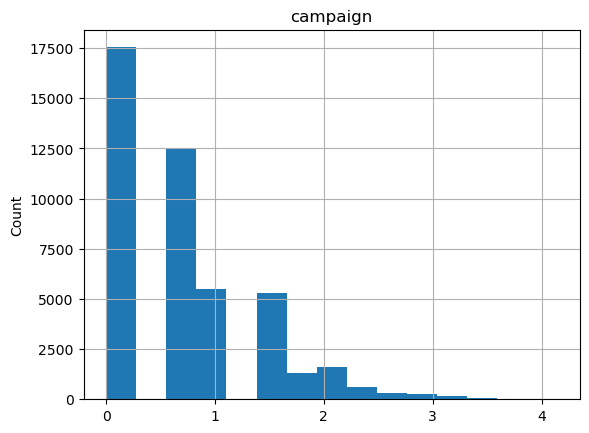

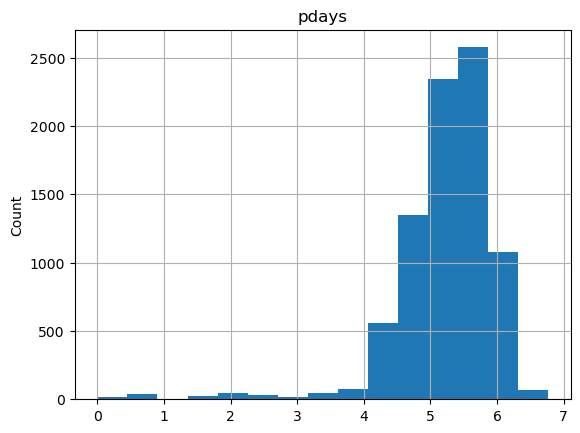

In [17]:
# Log Tranformatons
        
for feature in continious_feature:
    bank_data1=bank.copy()
    if 0 in bank_data1[feature].unique():
        pass
    else:
        bank_data1[feature]=np.log(bank_data1[feature])
        bank_data1[feature].hist(bins=15)
        plt.ylabel("Count")
        plt.title(feature)
        plt.show()

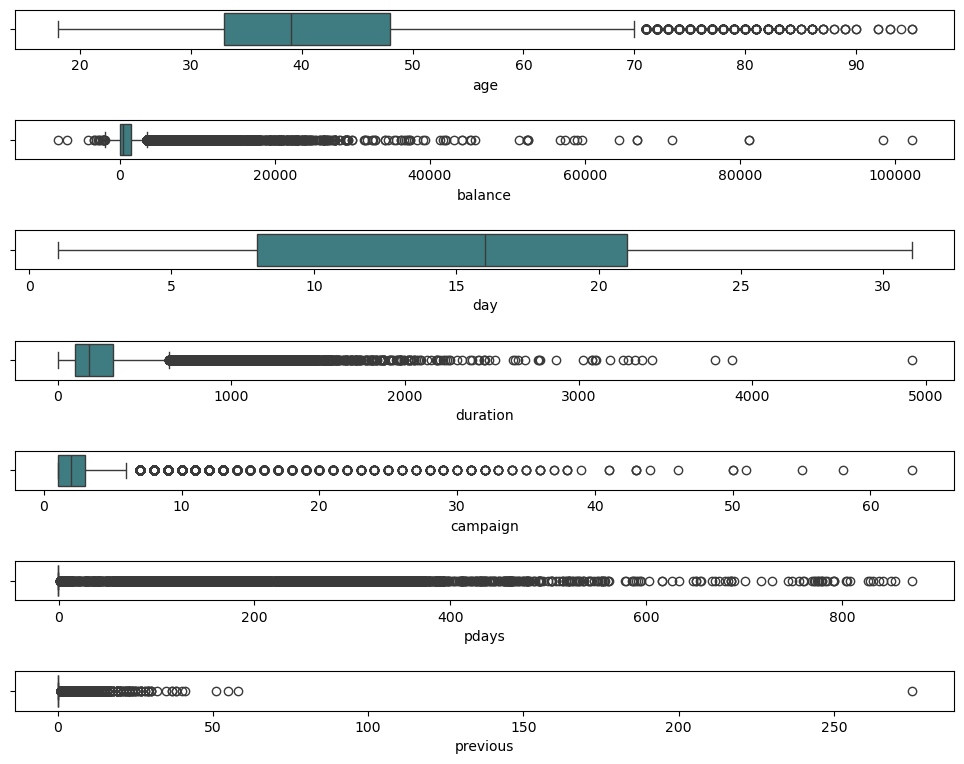

In [18]:
# Outliers Detection

outlier=bank.copy()
fig,axes=plt.subplots(7,1,figsize=(10,8),sharex=False,sharey=False)
sns.boxplot(x="age",data=outlier,palette="crest",ax=axes[0])
sns.boxplot(x="balance",data=outlier,palette="crest",ax=axes[1])
sns.boxplot(x="day",data=outlier,palette="crest",ax=axes[2])
sns.boxplot(x="duration",data=outlier,palette="crest",ax=axes[3])
sns.boxplot(x="campaign",data=outlier,palette="crest",ax=axes[4])
sns.boxplot(x="pdays",data=outlier,palette="crest",ax=axes[5])
sns.boxplot(x="previous",data=outlier,palette="crest",ax=axes[6])
plt.tight_layout(pad=2.0)


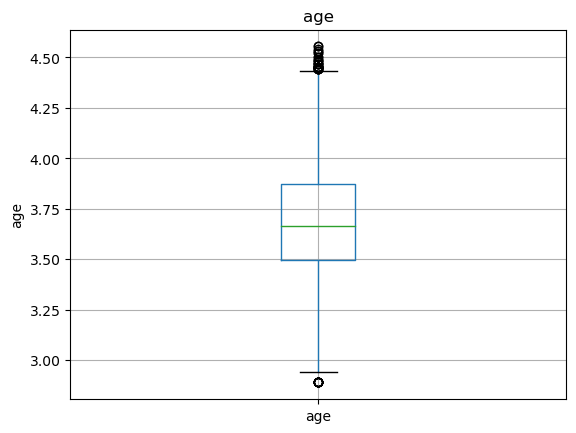

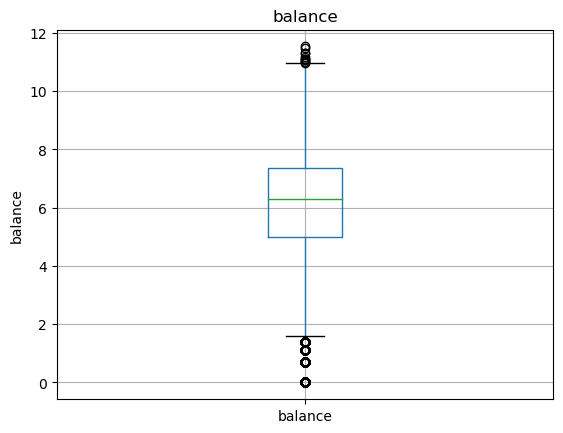

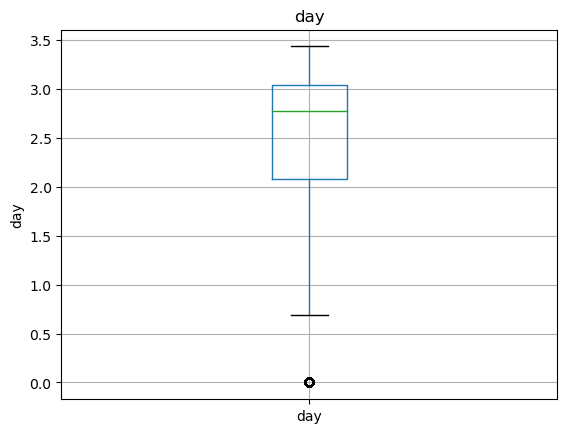

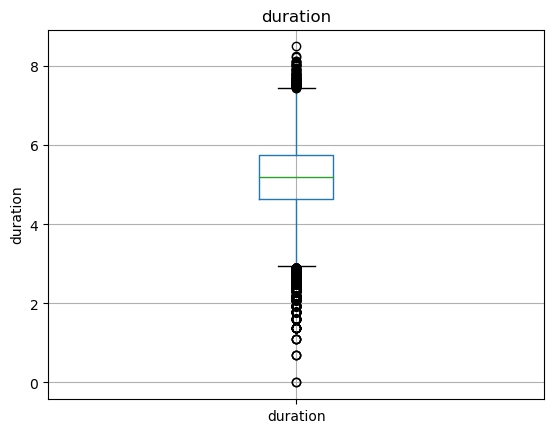

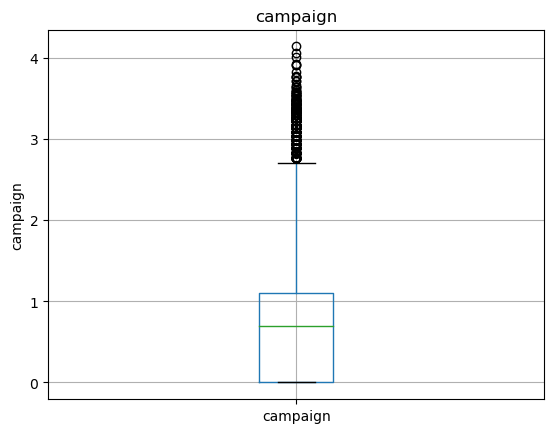

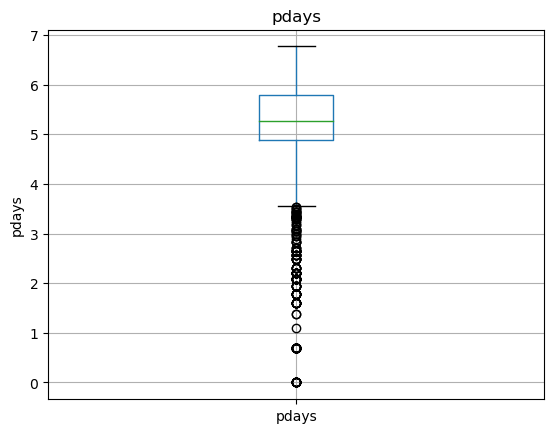

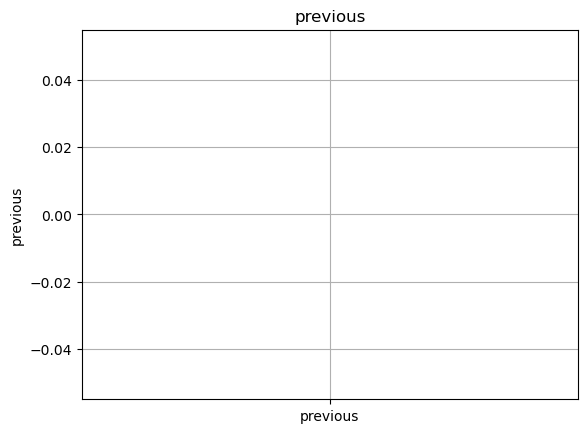

In [19]:
# After Log-Transformation

for feature in continious_feature:
    bank_data2=bank.copy()
    bank_data2[feature]=np.log(bank_data2[feature])
    bank_data2.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [20]:
# Data Preprocessing

bank[['job','marital','education','default','housing','loan','contact','poutcome','month','y']] = bank[
    ['job','marital','education','default','housing','loan','contact','poutcome','month','y']].astype('category')
bank_data_new = bank

In [21]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [22]:
# Label Encoding

bank_data_new['month'] = bank_data_new['month'].cat.codes
bank_data_new['job'] = bank_data_new['job'].cat.codes
bank_data_new['marital'] = bank_data_new['marital'].cat.codes
bank_data_new['education'] = bank_data_new['education'].cat.codes
bank_data_new['default'] = bank_data_new['default'].cat.codes
bank_data_new['housing'] = bank_data_new['housing'].cat.codes
bank_data_new['loan'] = bank_data_new['loan'].cat.codes
bank_data_new['contact'] = bank_data_new['contact'].cat.codes
bank_data_new['poutcome'] = bank_data_new['poutcome'].cat.codes
bank_data_new['y'] = bank_data_new['y'].cat.codes

In [23]:
# Model Building

x1 = bank_data_new.drop('y', axis=1)
y1 = bank_data_new[['y']]

In [24]:
x1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3


In [25]:
y1

,y
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


In [26]:
x_train, x_test, y_train, y_test = train_test_split(x1,y1,test_size=0.20,random_state=12)
print("Shape of X_train : ",x_train.shape)
print("Shape of X_test  : ",x_test.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of y_test  : ",y_test.shape)

Shape of X_train :  (36168, 16)
Shape of X_test  :  (9043, 16)
Shape of y_train :  (36168, 1)
Shape of y_test  :  (9043, 1)


In [27]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train,y_train)

LogisticRegression()

In [28]:
logistic_model.coef_


array([[-2.34052897e-02,  1.59525040e-02, -1.12495774e-01,
        -1.71226527e-02, -5.38308853e-03,  3.49254066e-05,
        -2.20790212e-01, -6.60820458e-02, -2.27595617e-01,
        -1.78333177e-02, -6.64443844e-02,  3.47703304e-03,
        -3.24255834e-01, -9.97307420e-04,  1.33216416e-01,
        -2.15481449e-01]])

In [29]:
logistic_model.intercept_


array([-0.08544363])

In [30]:
# MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
scaler.fit(bank_data_new)
scaled_x=scaler.transform(bank_data_new)

In [31]:
scaled_x

array([[0.51948052, 0.36363636, 0.5       , ..., 0.        , 1.        ,
        0.        ],
       [0.33766234, 0.81818182, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.19480519, 0.18181818, 0.5       , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.7012987 , 0.45454545, 0.5       , ..., 0.01090909, 0.66666667,
        1.        ],
       [0.50649351, 0.09090909, 0.5       , ..., 0.        , 1.        ,
        0.        ],
       [0.24675325, 0.18181818, 0.5       , ..., 0.04      , 0.33333333,
        0.        ]])

In [32]:
classifier1=LogisticRegression()
classifier1.fit(scaled_x,y1)

LogisticRegression()

In [33]:
classifier1.coef_

array([[ 0.0870051 ,  0.04775924,  0.12651324,  0.16252677, -0.0576052 ,
         0.03974224, -0.34339486, -0.23072377, -0.46707242, -0.10404694,
         0.124258  ,  0.90757706, -0.1296082 ,  0.21393142,  0.01923177,
        -0.1480058 , 13.73203525]])

In [34]:

proba1=classifier1.predict_proba(scaled_x)
proba1

array([[9.99760781e-01, 2.39218924e-04],
       [9.99762234e-01, 2.37766449e-04],
       [9.99832546e-01, 1.67453699e-04],
       ...,
       [1.67888481e-03, 9.98321115e-01],
       [9.99598875e-01, 4.01125023e-04],
       [9.99437111e-01, 5.62889153e-04]])

In [35]:

y_pred1=classifier1.predict(scaled_x)
y_pred1

array([0, 0, 0, ..., 1, 0, 0], dtype=int8)

In [36]:
#  Model Testing ||  Model Evaluation

# Training the Data

y_pred_train1 = logistic_model.predict(x_train)


In [37]:
print(confusion_matrix(y_train, y_pred_train1))


[[31347   582]
 [ 3507   732]]


In [38]:
print(classification_report(y_train,y_pred_train1))


              precision    recall  f1-score   support

           0       0.90      0.98      0.94     31929
           1       0.56      0.17      0.26      4239

    accuracy                           0.89     36168
   macro avg       0.73      0.58      0.60     36168
weighted avg       0.86      0.89      0.86     36168



In [39]:
accuracy_score(y_train,y_pred_train1)


0.8869442601194426

AUC Score: 81.64%


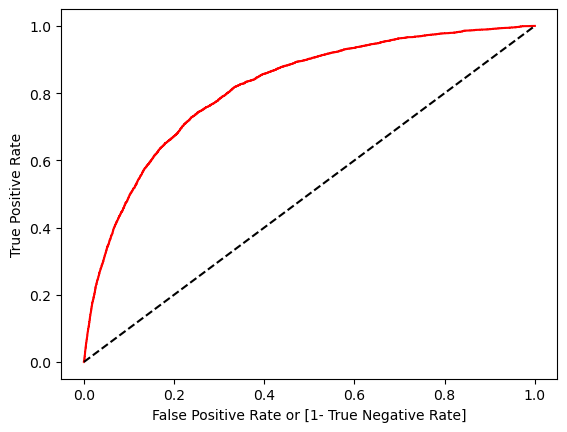

In [40]:
fpr,tpr,thresholds=roc_curve(y_train,logistic_model.predict_proba(x_train)[:,1])

auc=roc_auc_score(y_train,logistic_model.predict_proba(x_train)[:,1])
print("AUC Score: {:.2f}%".format(auc*100))

plt.plot(fpr,tpr,color="red",label="logit model (area=%0.2f)" %auc)
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate or [1- True Negative Rate]")
plt.ylabel("True Positive Rate")
plt.show()

In [41]:
classification_report1=classification_report(y_train,y_pred_train1)
print(classification_report1)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     31929
           1       0.56      0.17      0.26      4239

    accuracy                           0.89     36168
   macro avg       0.73      0.58      0.60     36168
weighted avg       0.86      0.89      0.86     36168



In [42]:
# Testing Data

y_pred_test1=logistic_model.predict(x_test)

In [43]:

print(confusion_matrix(y_test,y_pred_test1))

[[7847  146]
 [ 852  198]]


In [44]:

print(classification_report(y_test,y_pred_test1))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7993
           1       0.58      0.19      0.28      1050

    accuracy                           0.89      9043
   macro avg       0.74      0.59      0.61      9043
weighted avg       0.86      0.89      0.86      9043



In [45]:

accuracy_score(y_test,y_pred_test1).mean()*100

88.96383943381622

AUC Score : 83.00%


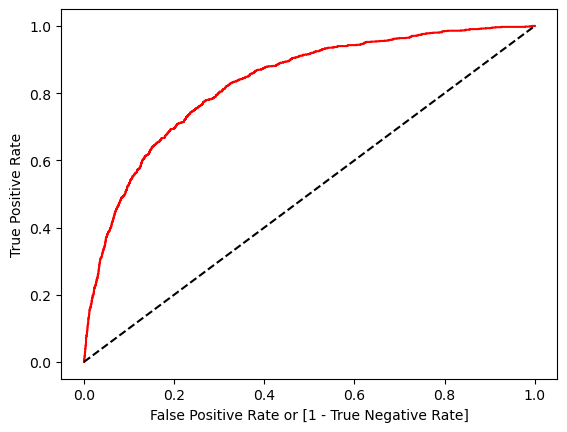

In [46]:
fpr,tpr,thresholds=roc_curve(y_test,logistic_model.predict_proba(x_test)[:,1])

auc=roc_auc_score(y_test,logistic_model.predict_proba(x_test)[:,1])
print("AUC Score : {:.2f}%".format(auc*100))
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

In [47]:
classification_report2=classification_report(y_test,y_pred_test1)
print(classification_report2)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7993
           1       0.58      0.19      0.28      1050

    accuracy                           0.89      9043
   macro avg       0.74      0.59      0.61      9043
weighted avg       0.86      0.89      0.86      9043



In [48]:
#  Compare the training-set and testing-set accuracy
# Check for overfitting and underfitting (the scores on training and testing set)

print('Training set score : {:.2f}%'.format(logistic_model.score(x_train, y_train)*100))
print('Test set score     : {:.2f}%'.format(logistic_model.score(x_test, y_test)*100))

Training set score : 88.69%
Test set score     : 88.96%


# For Training set score : 88.69%

# For Testing set score     : 88.96%